# Explore here

In [2]:
import pandas as pd
import csv
import requests
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import missingno as msno
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier 


In [3]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
response = requests.get(url).content.decode('utf-8')

file_name = '../data/raw/bank-marketing-campaign-data.csv'

with open(file_name, 'w') as temp_file:
    temp_file.writelines(response)

In [4]:
df = pd.read_csv(file_name, sep=';')
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [5]:
#Obtenemos los valores únicos para averiguar si hay algun valor a descartar, no hay.

n_unicos = df.nunique()
n_unicos

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [6]:
#Buscamos registros duplicados, hay 12.
print(df.duplicated().sum())

12


In [7]:
df[df.duplicated() == True]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.40,93.44,-36.10,4.96,5228.10,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.40,93.44,-36.10,4.97,5228.10,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.10,93.20,-42.00,4.15,5195.80,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.80,93.08,-47.10,1.42,5099.10,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.80,92.89,-46.20,1.31,5099.10,no


In [8]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [9]:
print(df.isnull().mean()*100)

#No hay valores nulos

age              0.00
job              0.00
marital          0.00
education        0.00
default          0.00
housing          0.00
loan             0.00
contact          0.00
month            0.00
day_of_week      0.00
duration         0.00
campaign         0.00
pdays            0.00
previous         0.00
poutcome         0.00
emp.var.rate     0.00
cons.price.idx   0.00
cons.conf.idx    0.00
euribor3m        0.00
nr.employed      0.00
y                0.00
dtype: float64


In [10]:
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [11]:
print(df["contact"].unique())

#La forma de contacto no es relevante para el estudio

df.drop(['contact'], axis=1, inplace=True)


['telephone' 'cellular']


In [12]:
#Teniendo el parámetro pdays el día y el mes de contacto me parecen irrelevantes para el estudio, los elimino

df.drop(['month'], axis=1, inplace=True)
df.drop(['day_of_week'], axis=1, inplace=True)

<Axes: >

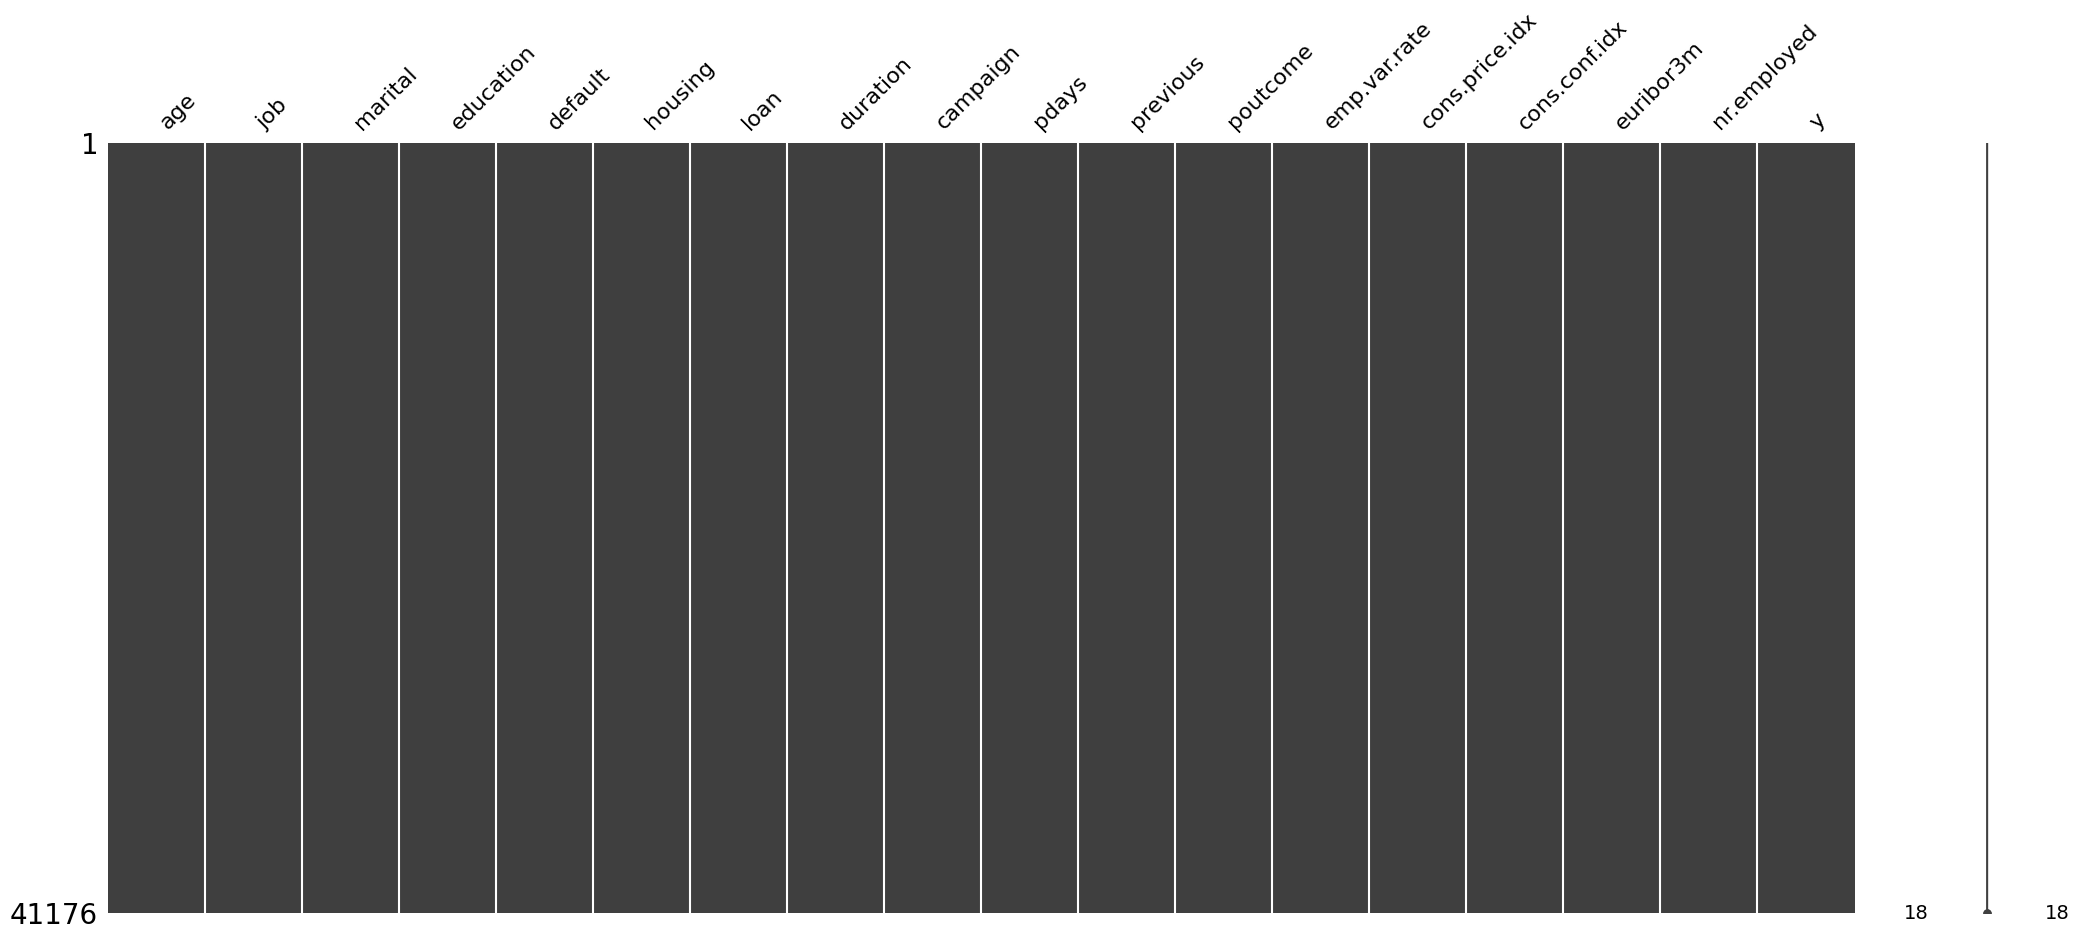

In [13]:
msno.matrix(df)

In [14]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00
mean,40.02,258.32,2.57,962.46,0.17,0.08,93.58,-40.50,3.62,5167.03
std,10.42,259.31,2.77,186.94,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   duration        41176 non-null  int64  
 8   campaign        41176 non-null  int64  
 9   pdays           41176 non-null  int64  
 10  previous        41176 non-null  int64  
 11  poutcome        41176 non-null  object 
 12  emp.var.rate    41176 non-null  float64
 13  cons.price.idx  41176 non-null  float64
 14  cons.conf.idx   41176 non-null  float64
 15  euribor3m       41176 non-null  float64
 16  nr.employed     41176 non-null  float64
 17  y               41176 non-null  obje

In [70]:
print(df.duplicated().sum())

# Hay un registro duplicado

0


In [69]:
df.drop_duplicates(inplace=True)

In [17]:
print(df["job"].unique())

df["job_f"] = pd.factorize(df["job"])[0]


['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [18]:
print(df["marital"].unique())

df["marital_f"] = pd.factorize(df["marital"])[0]

['married' 'single' 'divorced' 'unknown']


In [19]:
print(df["education"].unique())

df.loc[df["education"] == "unknown" , 'education_f'] = 0
df.loc[df["education"] == "illiterate" , 'education_f'] = 1
df.loc[df["education"] == "basic.4y" , 'education_f'] = 2
df.loc[df["education"] == "basic.6y" , 'education_f'] = 3
df.loc[df["education"] == "basic.9y" , 'education_f'] = 4
df.loc[df["education"] == "high.school" , 'education_f'] = 5
df.loc[df["education"] == "professional.course" , 'education_f'] = 6
df.loc[df["education"] == "university.degree" , 'education_f'] = 7



['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [20]:
print(df["default"].unique())

df.loc[df["default"] == "unknown" , 'default_f'] = 0
df.loc[df["default"] == "no" , 'default_f'] = 1
df.loc[df["default"] == "yes" , 'default_f'] = 2

['no' 'unknown' 'yes']


In [21]:
print(df["housing"].unique())

df.loc[df["housing"] == "unknown" , 'housing_f'] = 0
df.loc[df["housing"] == "no" , 'housing_f'] = 1
df.loc[df["housing"] == "yes" , 'housing_f'] = 2

['no' 'yes' 'unknown']


In [22]:
print(df["loan"].unique())

df.loc[df["loan"] == "unknown" , 'loan_f'] = 0
df.loc[df["loan"] == "no" , 'loan_f'] = 1
df.loc[df["loan"] == "yes" , 'loan_f'] = 2

['no' 'yes' 'unknown']


In [23]:
print(df["poutcome"].unique())

df.loc[df["poutcome"] == "nonexistent" , 'poutcome_f'] = 0
df.loc[df["poutcome"] == "failure" , 'poutcome_f'] = 1
df.loc[df["poutcome"] == "success" , 'poutcome_f'] = 2


['nonexistent' 'failure' 'success']


In [24]:
print(df["y"].unique())

df.loc[df["y"] == "no" , 'y'] = 0
df.loc[df["y"] == "yes" , 'y'] = 1

['no' 'yes']


In [25]:
df.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_f,marital_f,education_f,default_f,housing_f,loan_f,poutcome_f
0,56,housemaid,married,basic.4y,no,no,no,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0,0,0,2.00,1.00,1.00,1.00,0.00
1,57,services,married,high.school,unknown,no,no,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0,1,0,5.00,0.00,1.00,1.00,0.00
2,37,services,married,high.school,no,yes,no,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0,1,0,5.00,1.00,2.00,1.00,0.00
3,40,admin.,married,basic.6y,no,no,no,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0,2,0,3.00,1.00,1.00,1.00,0.00
4,56,services,married,high.school,no,no,yes,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0,1,0,5.00,1.00,1.00,2.00,0.00


In [26]:
df.info(max_cols=len(df.columns))

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   duration        41176 non-null  int64  
 8   campaign        41176 non-null  int64  
 9   pdays           41176 non-null  int64  
 10  previous        41176 non-null  int64  
 11  poutcome        41176 non-null  object 
 12  emp.var.rate    41176 non-null  float64
 13  cons.price.idx  41176 non-null  float64
 14  cons.conf.idx   41176 non-null  float64
 15  euribor3m       41176 non-null  float64
 16  nr.employed     41176 non-null  float64
 17  y               41176 non-null  obje

In [27]:
#Separamos la variable dependiente de las independientes (y las variables no factorizadas) con el nuevo dataframe 
X = df[["age", "job_f", "marital_f", "education_f", "default_f",	
                        "housing_f", "loan_f", "duration", "campaign", "pdays", "previous", "poutcome_f", "emp.var.rate",	
                        "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Usamos xgb para conocer la importancia de las características
xgb_model = xgb.XGBClassifier(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
print(df_imp)

           Feature  Importance
16     nr.employed       60.76
11      poutcome_f       14.44
7         duration        4.59
14   cons.conf.idx        2.82
13  cons.price.idx        2.38
9            pdays        2.15
4        default_f        1.71
15       euribor3m        1.69
3      education_f        1.25
8         campaign        1.25
12    emp.var.rate        1.16
0              age        1.05
1            job_f        1.04
2        marital_f        1.00
10        previous        0.97
6           loan_f        0.94
5        housing_f        0.79


Elimino las columnas marital_f, previous, loan_f y housing_f al ser menores del 1% en importancia 

In [29]:
df1 = df[["age", "job_f", "education_f", "default_f",	
                        "duration", "campaign", "pdays", "poutcome_f", "emp.var.rate",	
                        "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"]]

In [30]:
X = df1.drop(['y'], axis=1)
y = df1['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif


age                  1.41
job_f                1.35
education_f          1.58
default_f            1.95
duration             1.06
campaign             2.07
pdays               18.21
poutcome_f          25.51
emp.var.rate      6609.08
cons.price.idx     607.79
cons.conf.idx      162.90
euribor3m        22959.74
nr.employed       8066.07
dtype: float64

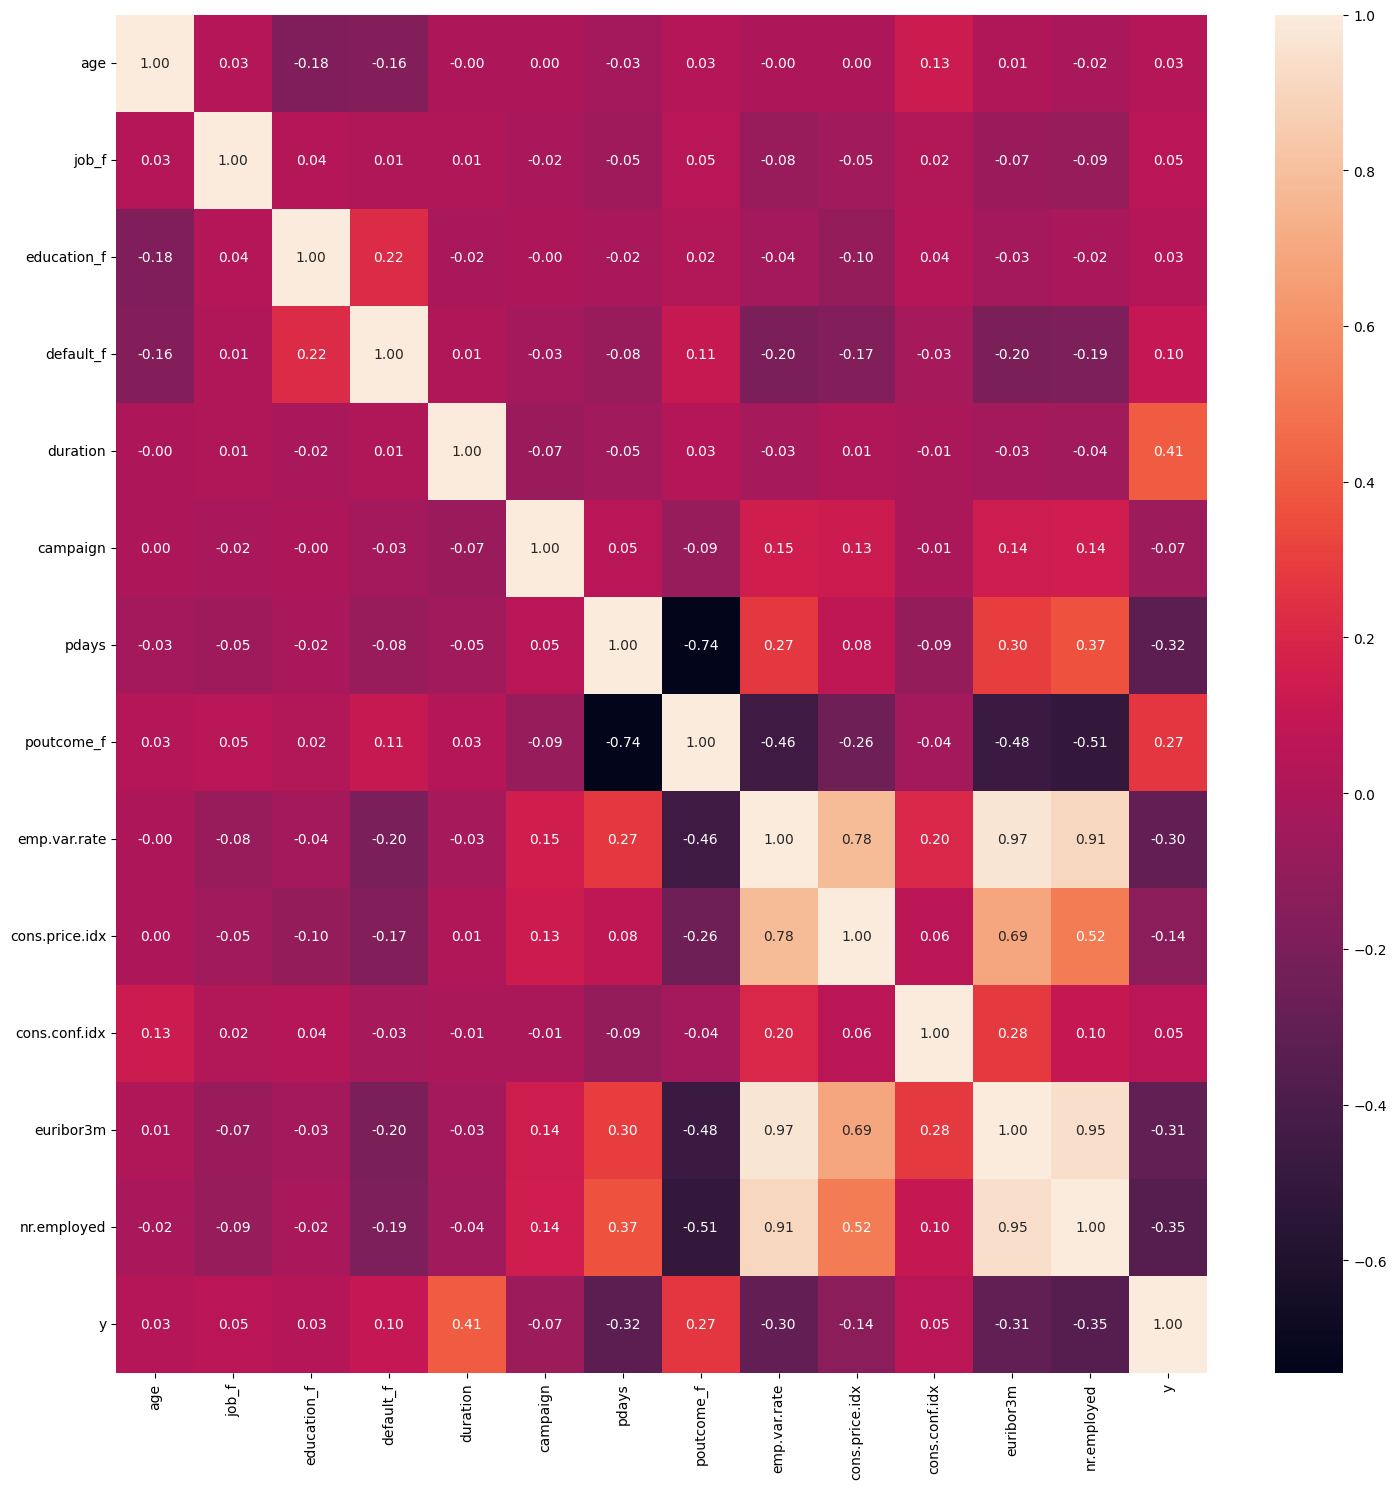

In [32]:
fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df1.corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

Observamos que la variable con más importancia es el euribor.
Las variables nr.employed y emp.var.rate están relaccionadas entre sí, ambas relativas a empleados, y están fuertemente correlacionadas en el heatmap, por lo que me quedo con nr.employed, ya que tiene un vif más alto.

In [33]:
df1.drop(['emp.var.rate'], axis=1, inplace=True)



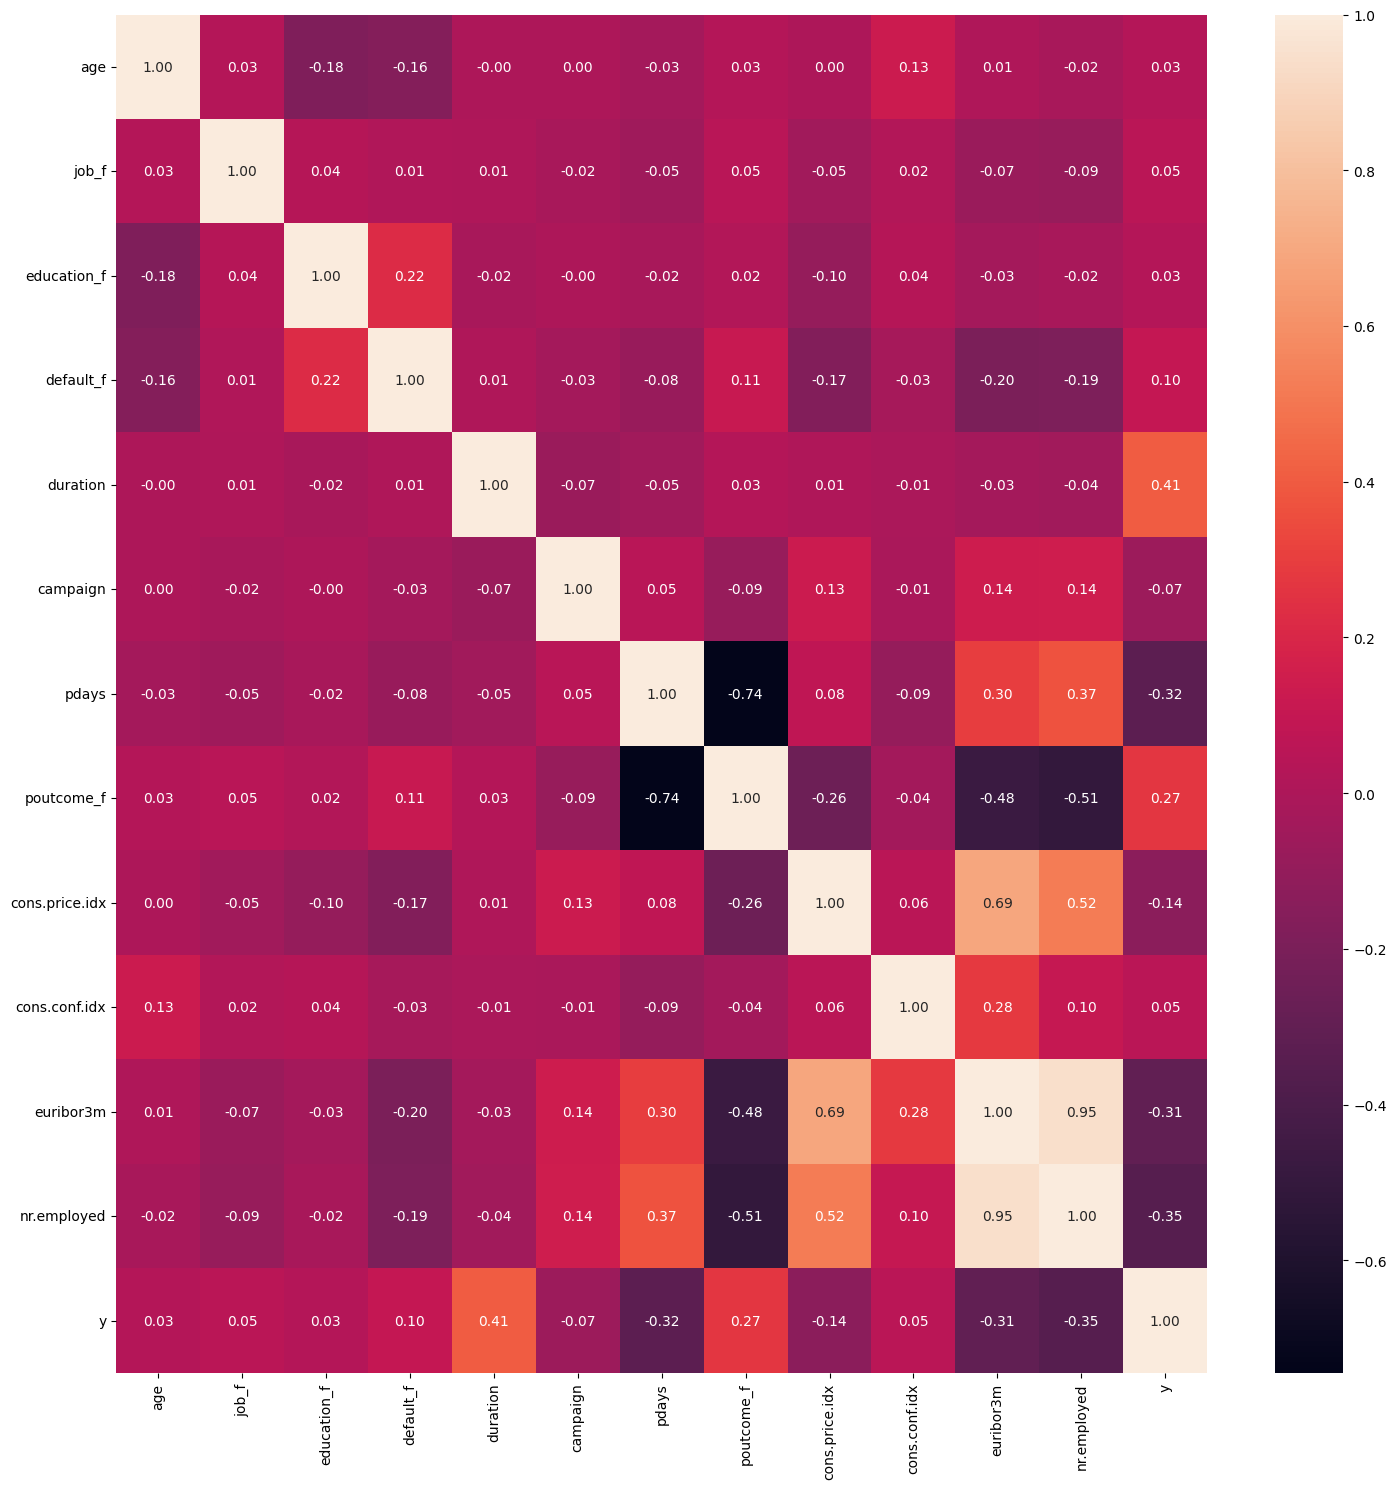

In [34]:
fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df1.corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

Sigue habiendo variables con mucha correlación entre sí, pero referentes a diferentes características (euribor y número de empleados, por ejemplo, tiene sentido que tengan relacción, pero una es una variable económica que afecta a otras variables, y los empleados son datos relativos a personal), así que de momento decido dejar el dataframe con estas características.

In [35]:
X = df1.drop(['y'], axis=1)
y = df1['y'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Identificar las variables binarias
binary_cols = X_train[(X_train == 0)|(X_train == 1)].dropna(axis=1).columns
binary_cols

Index([], dtype='object')

In [37]:
scaler = MinMaxScaler().fit(X_train)

In [38]:
# Trasnformamos los datos numericos con el escalador ajustado
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [39]:
# Selección del algoritmo de clasificacion
reg = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
scores, predictions = reg.fit(X_train_sc, X_test_sc, y_train, y_test)

 12%|█▎        | 4/32 [00:03<00:19,  1.41it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X).


 28%|██▊       | 9/32 [00:06<00:15,  1.51it/s]

FixedThresholdClassifier model failed to execute
FixedThresholdClassifier.__init__() missing 1 required positional argument: 'estimator'


 38%|███▊      | 12/32 [00:07<00:12,  1.64it/s]

LabelPropagation model failed to execute
Unable to allocate 8.08 GiB for an array with shape (32940, 32940) and data type float64
LabelSpreading model failed to execute
Unable to allocate 8.08 GiB for an array with shape (32940, 32940) and data type float64


 66%|██████▌   | 21/32 [00:09<00:02,  4.35it/s]

NuSVC model failed to execute
specified nu is infeasible


 84%|████████▍ | 27/32 [00:27<00:14,  2.87s/it]

SelfTrainingClassifier model failed to execute
You must pass an estimator to SelfTrainingClassifier. Use `estimator`.
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
TunedThresholdClassifierCV model failed to execute
TunedThresholdClassifierCV.__init__() missing 1 required positional argument: 'estimator'


 97%|█████████▋| 31/32 [00:27<00:01,  1.46s/it]

XGBClassifier model failed to execute
'super' object has no attribute '__sklearn_tags__'
[LightGBM] [Info] Number of positive: 3668, number of negative: 29272
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 605
[LightGBM] [Info] Number of data points in the train set: 32940, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111354 -> initscore=-2.076985
[LightGBM] [Info] Start training from score -2.076985


100%|██████████| 32/32 [00:28<00:00,  1.14it/s]


In [40]:
scores

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.81,0.76,0.76,0.83,0.06
QuadraticDiscriminantAnalysis,0.88,0.75,0.75,0.88,0.06
LGBMClassifier,0.91,0.75,0.75,0.91,0.49
RandomForestClassifier,0.91,0.74,0.74,0.91,3.52
Perceptron,0.88,0.73,0.73,0.88,0.05
GaussianNB,0.87,0.73,0.73,0.88,0.04
DecisionTreeClassifier,0.89,0.72,0.72,0.89,0.21
BernoulliNB,0.86,0.72,0.72,0.87,0.06
ExtraTreeClassifier,0.88,0.72,0.72,0.88,0.05


In [41]:
# El mejor modelo en base a las métricas parece ser LGBMClassifier

# Instanciamos el estimador
estimator = lgb.LGBMClassifier()

# Definimos el espacio de búsqueda de los hp
param_dist = {'n_estimators':[10, 50, 100, 250], 'max_depth':np.arange(10, 100, 10)}

# Realizamos la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator, param_dist, n_iter=5, random_state=42, n_jobs=-1, scoring='accuracy', verbose=2, cv=5)
random_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2935, number of negative: 23417
[LightGBM] [Info] Number of positive: 2935, number of negative: 23417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111377 -> initscore=-2.076755
[LightGBM] [Info] Start training from score -2.076755
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [bin

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END .....................max_depth=90, n_estimators=250; total time=   1.0s
[CV] END .....................max_depth=90, n_estimators=250; total time=   1.1s
[LightGBM] [Info] Number of positive: 2934, number of negative: 23418
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111339 -> initscore=-2.077138
[LightGBM] [Info] Start training from score -2.077138


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2934, number of negative: 23418
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111339 -> initscore=-2.077138
[LightGBM] [Info] Start training from score -2.077138


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END .....................max_depth=90, n_estimators=250; total time=   1.2s
[CV] END .....................max_depth=90, n_estimators=250; total time=   1.1s
[LightGBM] [Info] Number of positive: 2934, number of negative: 23418
[LightGBM] [Info] Number of positive: 2935, number of negative: 23417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111339 -> initscore=-2.077138
[LightGBM] [Info] Start training from score -2.077138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info]

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END ......................max_depth=40, n_estimators=50; total time=   0.4s
[LightGBM] [Info] Number of positive: 2935, number of negative: 23417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111377 -> initscore=-2.076755
[LightGBM] [Info] Start training from score -2.076755


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END ......................max_depth=40, n_estimators=50; total time=   0.3s
[LightGBM] [Info] Number of positive: 2934, number of negative: 23418
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111339 -> initscore=-2.077138
[LightGBM] [Info] Start training from score -2.077138


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END ......................max_depth=40, n_estimators=50; total time=   0.3s
[CV] END .....................max_depth=90, n_estimators=250; total time=   1.1s
[LightGBM] [Info] Number of positive: 2934, number of negative: 23418
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111339 -> initscore=-2.077138
[LightGBM] [Info] Start training from score -2.077138
[LightGBM] [Info] Number of positive: 2934, number of negative: 23418
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END ......................max_depth=40, n_estimators=50; total time=   0.4s
[CV] END ......................max_depth=40, n_estimators=50; total time=   0.3s
[LightGBM] [Info] Number of positive: 2935, number of negative: 23417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111377 -> initscore=-2.076755
[LightGBM] [Info] Start training from score -2.076755
[LightGBM] [Info] Number of positive: 2935, number of negative: 23417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END .....................max_depth=70, n_estimators=100; total time=   0.5s
[LightGBM] [Info] Number of positive: 2934, number of negative: 23418
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111339 -> initscore=-2.077138
[LightGBM] [Info] Start training from score -2.077138
[CV] END .....................max_depth=70, n_estimators=100; total time=   0.6s
[LightGBM] [Info] Number of positive: 2934, number of negative: 23418
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END .....................max_depth=70, n_estimators=100; total time=   0.5s
[LightGBM] [Info] Number of positive: 2934, number of negative: 23418
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111339 -> initscore=-2.077138
[LightGBM] [Info] Start training from score -2.077138
[CV] END .....................max_depth=70, n_estimators=100; total time=   0.6s


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2935, number of negative: 23417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111377 -> initscore=-2.076755
[LightGBM] [Info] Start training from score -2.076755


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END .....................max_depth=70, n_estimators=100; total time=   0.5s
[LightGBM] [Info] Number of positive: 2935, number of negative: 23417
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111377 -> initscore=-2.076755
[LightGBM] [Info] Start training from score -2.076755
[CV] END .....................max_depth=80, n_estimators=100; total time=   0.5s


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2934, number of negative: 23418
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111339 -> initscore=-2.077138
[LightGBM] [Info] Start training from score -2.077138


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END .....................max_depth=80, n_estimators=100; total time=   0.6s
[CV] END .....................max_depth=80, n_estimators=100; total time=   0.4s
[LightGBM] [Info] Number of positive: 2934, number of negative: 23418
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111339 -> initscore=-2.077138
[LightGBM] [Info] Start training from score -2.077138
[LightGBM] [Info] Number of positive: 2934, number of negative: 23418
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.

[CV] END .....................max_depth=80, n_estimators=100; total time=   0.5s
[LightGBM] [Info] Number of positive: 2935, number of negative: 23417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111377 -> initscore=-2.076755
[LightGBM] [Info] Start training from score -2.076755
[CV] END .....................max_depth=80, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=50, n_estimators=10; total time=   0.1s
[LightGBM] [Info] Number of positive: 2935, number of negative: 23417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002300 seconds.
You can set `force_row_wise

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.

[LightGBM] [Info] Number of positive: 3668, number of negative: 29272
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 32940, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111354 -> initscore=-2.076985
[LightGBM] [Info] Start training from score -2.076985


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'n_estimators': [10, 50, 100, 250]},
                   random_state=42, scoring='accuracy', verbose=2)

In [42]:
random_search.best_score_

np.float64(0.9175166970248938)

In [43]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': np.int64(40)}

In [44]:
random_search.best_estimator_

LGBMClassifier(max_depth=np.int64(40), n_estimators=50)

In [45]:
param_dist = {'n_estimators':[40, 50, 60], 'max_depth':np.arange(30, 60, 10)}

# Realizamos la búsqueda por fuerza bruta
grid_search = GridSearchCV(estimator, param_dist, verbose=3)
grid_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Info] Number of positive: 2935, number of negative: 23417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111377 -> initscore=-2.076755
[LightGBM] [Info] Start training from score -2.076755
[CV 1/5] END .....max_depth=30, n_estimators=40;, score=0.918 total time=   0.2s


[LightGBM] [Info] Number of positive: 2935, number of negative: 23417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111377 -> initscore=-2.076755
[LightGBM] [Info] Start training from score -2.076755
[CV 2/5] END .....max_depth=30, n_estimators=40;, score=0.920 total time=   0.2s
[LightGBM] [Info] Number of positive: 2934, number of negative: 23418
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data p

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'max_depth': array([30, 40, 50]),
                         'n_estimators': [40, 50, 60]},
             verbose=3)

In [46]:
grid_search.best_estimator_

LGBMClassifier(max_depth=np.int64(30), n_estimators=40)

In [47]:
# Evalúo el modelo

y_pred_train = np.exp(grid_search.best_estimator_.predict(X_train_sc))
y_pred_test = np.exp(grid_search.best_estimator_.predict(X_test_sc))
y_train_eu = np.exp(y_train)
y_test_eu = np.exp(y_test)

In [48]:
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular las métricas para entrenamiento
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)*100
    r2_train = r2_score(y_train, y_pred_train)

    # Calcular las métricas para test
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)*100
    r2_test = r2_score(y_test, y_pred_test)

    # Calcular las diferencias
    mae_diff = mae_test - mae_train
    mape_diff = mape_test - mape_train
    r2_diff = r2_test - r2_train

    # Crear el DataFrame
    metrics_df = pd.DataFrame({
        'MAE': [mae_train, mae_test, mae_diff],
        'MAPE': [mape_train, mape_test, mape_diff],
        'R2': [r2_train, r2_test, r2_diff]
    }, index=['Train', 'Test', 'Difference'])

    return metrics_df

In [49]:
calculate_metrics(y_train_eu, y_test_eu, y_pred_train, y_pred_test)

,MAE,MAPE,R2
Train,0.13,7.54,0.26
Test,0.14,8.50,0.19
Difference,0.02,0.97,-0.07


Se puede observar que no hay overfitting porque hay mae y mape en el set de train, y además es bastante buen ajuste de predicción
ya que la diferencia de mae y mape entre train y test es pequeña.

En esta situación elegimos un algoritmo de stacking.

In [50]:
clf = []

#clf.append(('Nearest Centroid', NearestCentroid()))
#clf.append(('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis()))
clf.append(('RandomForestClassifier', RandomForestClassifier(max_depth=np.int64(30), n_estimators=40, random_state=42)))
clf.append(('ExtraTreesClassifier', ExtraTreesClassifier(max_depth=np.int64(30), n_estimators=40, random_state=42)))
#clf.append(('LGBMClassifier', lgb.LGBMClassifier()))
clf.append(('LGBMClassifier', lgb.LGBMClassifier(max_depth=np.int64(20), n_estimators=30, random_state=42)))
#clf.append(('LGBMClassifier2', lgb.LGBMClassifier(max_depth=np.int64(30), n_estimators=40, random_state=42)))
#clf.append(('LGBMClassifier3', lgb.LGBMClassifier(max_depth=np.int64(40), n_estimators=50, random_state=42)))

#lr = lgb.LGBMClassifier(max_depth=np.int64(30), n_estimators=40, random_state=42)

lr = LogisticRegression(random_state=42)


In [51]:
stacking = StackingClassifier(estimators=clf,final_estimator=lr).fit(X_train_sc, y_train)
#stacking = StackingClassifier(estimators=clf).fit(X_train_sc, y_train)

[LightGBM] [Info] Number of positive: 3668, number of negative: 29272
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 32940, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111354 -> initscore=-2.076985
[LightGBM] [Info] Start training from score -2.076985
[LightGBM] [Info] Number of positive: 2935, number of negative: 23417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 12
[LightGBM] [Info] [bin

In [52]:
y_pred_train1 = np.exp(stacking.predict(X_train_sc))
y_pred_test1 = np.exp(stacking.predict(X_test_sc))

In [53]:
calculate_metrics(y_train_eu, y_test_eu, y_pred_train1, y_pred_test1)

,MAE,MAPE,R2
Train,0.07,3.73,0.58
Test,0.15,8.66,0.17
Difference,0.08,4.93,-0.41


He intentado afinar más el modelo (aunque creo que por las métricas está muy muy bien) y sin embargo con StackingClassifier
empeoran las métricas, pero no encuentro el motivo después de probar con muchas combinaciones de algoritmos, y solo consigo
que mejoren las métricas de train, pero empeoren las de test, que es justo lo que no buscamos.

In [54]:
# Reentrenamiento y exportación del modelo

binary_cols

Index([], dtype='object')

In [55]:
# Aplicamos el proceso a todo el conjunto de datos

X_final = pd.concat([X_train, X_test], ignore_index=True)
y_final = pd.concat([y_train, y_test], axis=0)

In [56]:
# Instanciamos el escalador y lo ajustamos a los datos
scaler = MinMaxScaler().fit(X_final)

# Transformamos los datos
X_final_sc = scaler.transform(X_final)

In [57]:
X_final_sc = pd.DataFrame(X_final_sc, columns=X_final.columns)

In [58]:
X_final_sc.head()

,age,job_f,education_f,default_f,duration,campaign,pdays,poutcome_f,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.15,0.91,0.43,0.50,0.06,0.04,1.00,0.00,0.67,0.34,0.98,1.00
1,0.41,0.18,1.00,0.50,0.04,0.09,1.00,0.00,0.88,0.38,0.96,1.00
2,0.15,0.18,1.00,0.50,0.02,0.05,1.00,0.00,0.48,0.62,0.98,1.00
3,0.22,0.18,1.00,0.50,0.03,0.00,1.00,0.00,0.70,0.60,0.96,0.86
4,0.28,0.27,0.71,0.00,0.08,0.00,1.00,0.00,0.27,0.19,0.15,0.51


In [59]:
# Entrenamos el mdelo LGBMClassifier con todos los datos, ya que el StackingClassifier daba peores resultados
modelo_final = lgb.LGBMClassifier(max_depth=np.int64(30), n_estimators=40).fit(X_final_sc, y_final)

[LightGBM] [Info] Number of positive: 4639, number of negative: 36537
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 41176, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112663 -> initscore=-2.063827
[LightGBM] [Info] Start training from score -2.063827


In [60]:
# Función que prepara los datos para predecir
def custom_transform(X):
  # No hay columnas binarias, así que no realizo la separación
  X_first_step_sc = scaler.transform(X)
  # Unimos la versión numérica escalada con los datos binarios
  X_sc = pd.DataFrame(X_first_step_sc, columns=X.columns)
  return X_sc

In [61]:
# Definimos los pasos a seguir
steps = [('transformacion', FunctionTransformer(func=custom_transform)),
         ('prediccion', modelo_final)]

# Creamos el pipeline
pipeline = Pipeline(steps)

In [62]:
# Exportamos el pipeline
joblib.dump(pipeline, '../data/processed/pipeline_model.pkl')

['../data/processed/pipeline_model.pkl']

In [63]:
# Cargamos el pipeline
loaded_pipeline = joblib.load('../data/processed/pipeline_model.pkl')

In [64]:
X_train.head(1)

,age,job_f,education_f,default_f,duration,campaign,pdays,poutcome_f,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12348,29,10,3.00,1.00,286,3,999,0.00,93.92,-42.70,4.96,5228.10


In [65]:
#X_train["euribor3m"].unique()

In [66]:
new_entry = pd.DataFrame({"age":[20,50],
     "job_f":[3, 11],
     "education_f":[1.0, 7.0],
     "default_f":[1.0, 2.0],
     "duration":[103,1108],
     "campaign":[56,1],
     "pdays":[999,1],
     "poutcome_f":[1.0,2.0],
     "cons.price.idx":[93.918,92.756],
     "cons.conf.idx":[-36.1,-45.9],
     "euribor3m":[4.959,0.933],
     "nr.employed":[5228.1,5176.3]})



new_entry

,age,job_f,education_f,default_f,duration,campaign,pdays,poutcome_f,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,20,3,1.00,1.00,103,56,999,1.00,93.92,-36.10,4.96,5228.10
1,50,11,7.00,2.00,1108,1,1,2.00,92.76,-45.90,0.93,5176.30


In [67]:
loaded_pipeline.predict(new_entry)

array([0, 1])